In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import pandas as pd

dist_drt/dist_bim ~  9.3526882085428


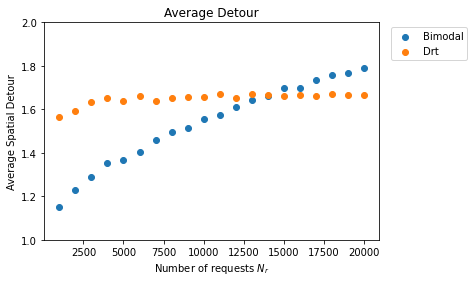

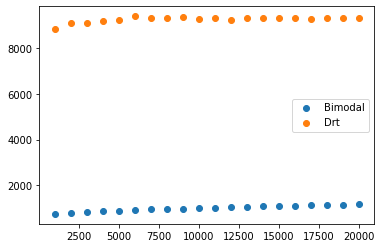

In [3]:
directory_bim = "/home/helge/Programs/matsim/matsim_results/output"
directory_drt = "/home/helge/Programs/matsim/matsim_results/24h_drt_1percent-drts_19102020"

def getDetours(directory):
    reqs = []
    average_detours = []
    average_distances = []
    
    for root, subdirs, files in os.walk(directory):
        for file in files:
            if file == '0.drt_detours_drt.csv':
                request = re.match(".*/(\d*)reqs/.*", root)
                reqs.append(request.group(1))
                df = pd.read_csv(os.path.join(root, file), sep=';')
                #TODO Time detour with or without waiting time?
                average_detours.append(df['distanceDetour'].mean())
                average_distances.append(df['distance'].mean())

    reqs = np.array([float(req) for req in reqs])
    average_detours = np.array(average_detours)
    average_distances = np.array(average_distances)

    return reqs, average_detours, average_distances
 

reqs_drt, av_detours_drt, av_dists_drt = getDetours(directory_drt)
reqs_bim, av_detours_bim, av_dists_bim = getDetours(directory_bim)

print('dist_drt/dist_bim ~ ', av_dists_drt.mean()/av_dists_bim.mean())

plt.scatter(reqs_bim, av_detours_bim, label=r"Bimodal")
plt.scatter(reqs_drt, av_detours_drt, label=r"Drt")
plt.xlabel(r"Number of requests $N_r$")
plt.ylabel(r"Average Spatial Detour")
plt.ylim(1, 2)
plt.title('Average Detour')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("AverageDistanceDetour.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

plt.scatter(reqs_bim, av_dists_bim, label=r"Bimodal")
plt.scatter(reqs_drt, av_dists_drt, label=r"Drt")
plt.legend()
plt.show()

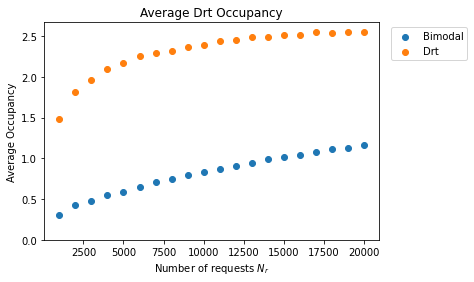

In [4]:
def getDrtOccupancies(directory):
    reqs = []
    average_occs = []
    
    for root, subdirs, files in os.walk(directory):
        for file in files:
            if file == '0.drt_occupancy_time_profiles_drt.txt':
                request = re.match(".*/(\d*)reqs/.*", root)
                reqs.append(request.group(1))
                df = pd.read_csv(os.path.join(root, file), sep='\t')
                passengers = [[pax, int(re.match('(\d)*\s*pax', pax).group(1))] for pax in df.columns if re.match('(\d)*\s*pax', pax)]
                pass_cols = [pax[0] for pax in passengers]
                pass_vals = np.array([pax[1] for pax in passengers])
                to_drop = [col for col in df.columns if col not in pass_cols]
                df.drop(columns=to_drop, inplace=True)
                pass_sum = df.sum(axis=1)
                df = df.apply(lambda row: row*pass_vals, axis=1)
                average_occs.append((df.sum(axis=1)/pass_sum).mean())

    reqs = np.array([float(req) for req in reqs])
    average_occs = np.array(average_occs)

    return reqs, average_occs

reqs_drt, av_occupancies_drt = getDrtOccupancies(directory_drt)
reqs_bim, av_occupancies_bim = getDrtOccupancies(directory_bim)

plt.scatter(reqs_bim, av_occupancies_bim, label=r"Bimodal")
plt.scatter(reqs_drt, av_occupancies_drt, label=r"Drt")
plt.xlabel(r"Number of requests $N_r$")
plt.ylabel(r"Average Occupancy")
plt.ylim(0, None)
plt.title('Average Drt Occupancy')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("AverageDrtOccupancy.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()